In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.equity_env import EquityEnv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import empyrical

%matplotlib inline

In [3]:
xom_returns = pd.read_csv('data/returns/XOM_Returns.csv', index_col='Date')
cvs_returns = pd.read_csv('data/returns/CVS_Returns.csv', index_col='Date')

In [39]:
def evaluate_strategy(returns_all: pd.Series, names_all: str):
    
    for i, returns in enumerate(returns_all):

        cumulative_return = empyrical.cum_returns(returns)
        annual_return = empyrical.annual_return(returns)
        max_drawdown = empyrical.max_drawdown(returns)
        sharpe_ratio = empyrical.sharpe_ratio(returns)
        sortino_ratio = empyrical.sortino_ratio(returns)
        omega_ratio = empyrical.omega_ratio(returns)
        
        print(names_all[i])
        print('-'*26)
        print('Cumulative Return: {}%'.format(np.round(cumulative_return[-1]*100, 2)))
        print('Annual Return: {}%'.format(np.round(annual_return*100, 2)))
        print('Max Drawdown: {}%'.format(np.round(max_drawdown*100, 2)))
        print('Sharpe ratio: {}'.format(np.round(sharpe_ratio, 2)))
        print('Sortino ratio: {}'.format(np.round(sortino_ratio, 2)))
        print('Omega ratio: {}'.format(np.round(omega_ratio, 2)))
        print('-'*26)
        print()
    
    fig, ax = plt.subplots(figsize=(20, 9))
    
    for i, returns in enumerate(returns_all):
        
        cumulative_return = (empyrical.cum_returns(returns)*100)
        
        cumulative_return.plot(figsize=(20, 5), ax=ax, label=names_all[i])
        
    plt.ylabel('% Returns')
    plt.grid(alpha=0.5)
    plt.legend()

XOM Results

Model
--------------------------
Cumulative Return: 0.64%
Annual Return: 0.42%
Max Drawdown: -12.66%
Sharpe ratio: 0.1
Sortino ratio: 0.15
Omega ratio: 1.02
--------------------------

Benchmark
--------------------------
Cumulative Return: -14.28%
Annual Return: -9.55%
Max Drawdown: -26.45%
Sharpe ratio: -0.39
Sortino ratio: -0.53
Omega ratio: 0.94
--------------------------

Strategy Alpha: 0.000579, Strategy Beta: -0.194104


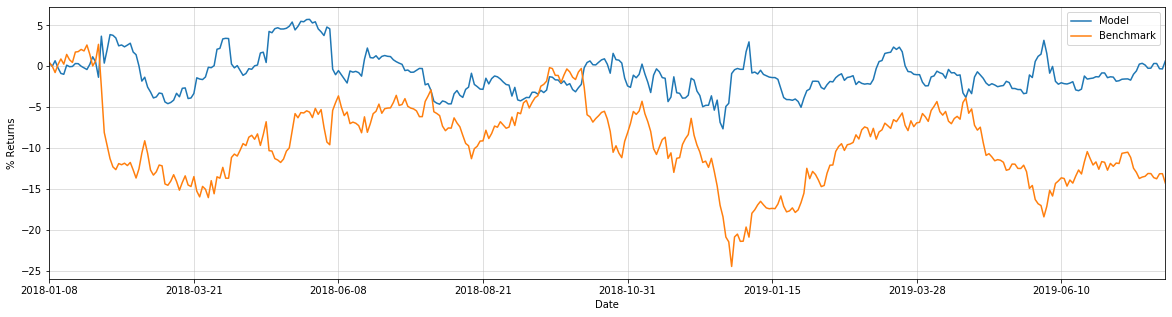

In [49]:
print('XOM Results\n')
strat_returns = [xom_returns['XOM.Model_Return'], xom_returns['XOM.Benchmark_Return']]
names = ['Model', 'Benchmark']

evaluate_strategy(strat_returns, names_all=names)

xom_alpha, xom_beta = empyrical.alpha_beta(xom_returns['XOM.Model_Return'],
                                           xom_returns['XOM.Benchmark_Return'])

print('Strategy Alpha: {}, Strategy Beta: {}'.format(round(xom_alpha, 6), round(xom_beta, 6)))

CVS Results

Model
--------------------------
Cumulative Return: 43.93%
Annual Return: 26.61%
Max Drawdown: -19.42%
Sharpe ratio: 1.21
Sortino ratio: 1.89
Omega ratio: 1.27
--------------------------

Benchmark
--------------------------
Cumulative Return: -28.78%
Annual Return: -19.74%
Max Drawdown: -37.67%
Sharpe ratio: -0.64
Sortino ratio: -0.85
Omega ratio: 0.9
--------------------------

Strategy Alpha: 0.255765, Strategy Beta: -0.171047


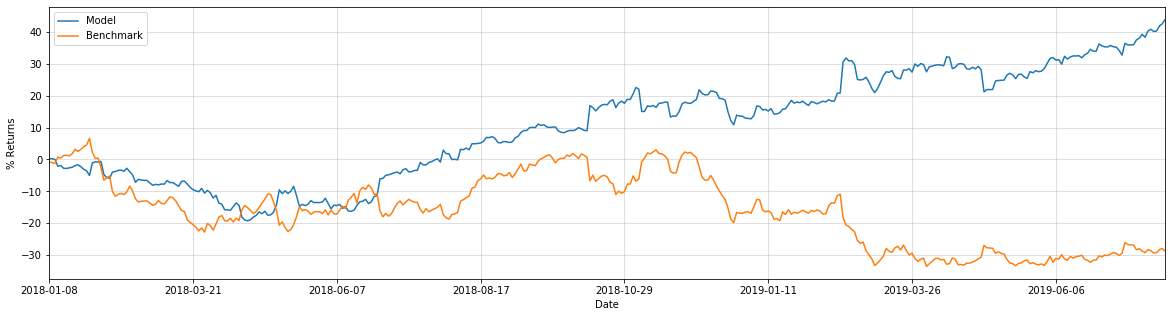

In [50]:
print('CVS Results\n')
strat_returns = [cvs_returns['CVS.Model_Return'], cvs_returns['CVS.Benchmark_Return']]
names = ['Model', 'Benchmark']

evaluate_strategy(strat_returns, names_all=names)

cvs_alpha, cvs_beta = empyrical.alpha_beta(cvs_returns['CVS.Model_Return'],
                                           cvs_returns['CVS.Benchmark_Return'])

print('Strategy Alpha: {}, Strategy Beta: {}'.format(round(cvs_alpha, 6), round(cvs_beta, 6)))